# Решающие деревья

![](https://i0.wp.com/docs.microsoft.com/en-us/azure/machine-learning/studio/media/algorithm-choice/image5.png?resize=495%2C706&ssl=1)

*Source: https://www.upnxtblog.com/index.php/2017/12/06/17-machine-learning-algorithms-that-you-should-know/*

Сами по себе решающие деревья используются в машинном обучении относительно редко, однако очень распространены методы, основанные на их композиции - ансамблях (Random Forest, XGBoost, LightGBM).

## Линейные модели или решающие деревья?

- когда данные хорошо линейно разделимы, линейная модель лучше

- когда данные плохо линейно разделимы (много сложных нелинейных зависимостей в данных), модель, основанная на решающих деревьях, лучше

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (11, 6.5)

Линейно разлимый пример

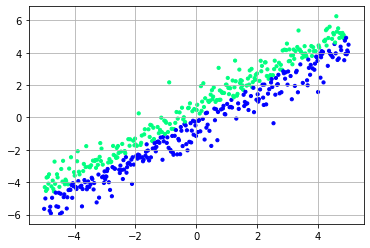

In [17]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 0.9 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap='winter')
plt.grid()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

**Задание**: Обучите Логистическую регрессию и посчитайте точность на тесте

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_pred_lr, y_test)

0.992

`mlxtend` позволяет красиво рисовать границы классов. Установим его и нарисуем

In [7]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 5.3 MB/s eta 0:00:01


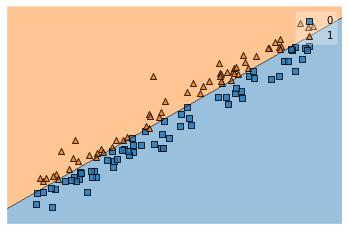

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, lr)
plt.axis('off')
plt.show()

Теперь используем нелинейную модель - `DecisionTreeClassifier`

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_pred_dt, y_test)

0.888

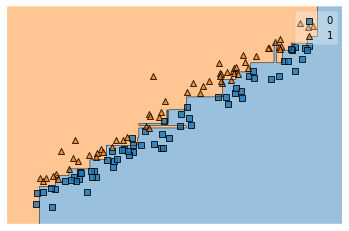

In [13]:
plot_decision_regions(X_test, y_test, dt)
plt.axis('off')
plt.show()

---
Теперь пример, когда данные линейно неразделимы.

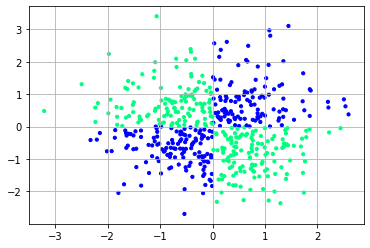

In [18]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap='winter')
plt.grid()
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

---
**Задание**: Обучите Логистическую регрессию и дерево решений. Для обеих моделей посчитайте точность на тесте и нарисуйте границы классов

In [20]:
# Train logistic regression and compute accuracy
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_pred_lr, y_test)
print('Accuracy for Logistic Regression ', lr_acc)

# Train Decision Tree and compute accuracy
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
tree_acc = accuracy_score(y_pred_dt, y_test)
print('Accuracy for Decision Tree ', tree_acc)

Accuracy for Logistic Regression  0.392
Accuracy for Decision Tree  0.968


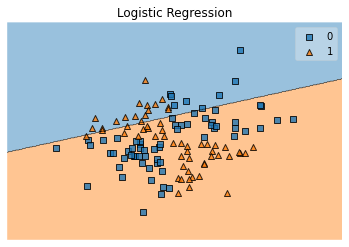

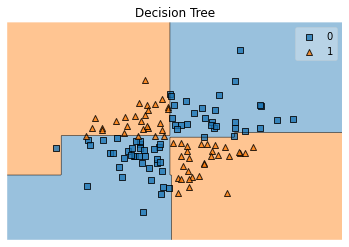

In [24]:
# Plot decision region for logistic regression
plot_decision_regions(X_test, y_test, lr)
plt.axis('off')
plt.title('Logistic Regression')
plt.show()

# Plot decision region for decision tree
plot_decision_regions(X_test, y_test, dt)
plt.axis('off')
plt.title('Decision Tree')
plt.show()

## Переобучение

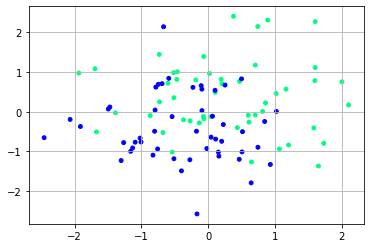

In [27]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=15, c=y, cmap='winter')
plt.grid()
plt.show()

Как влияют разные значения гиперпараметров решающего дерева на его структуру?

In [29]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой

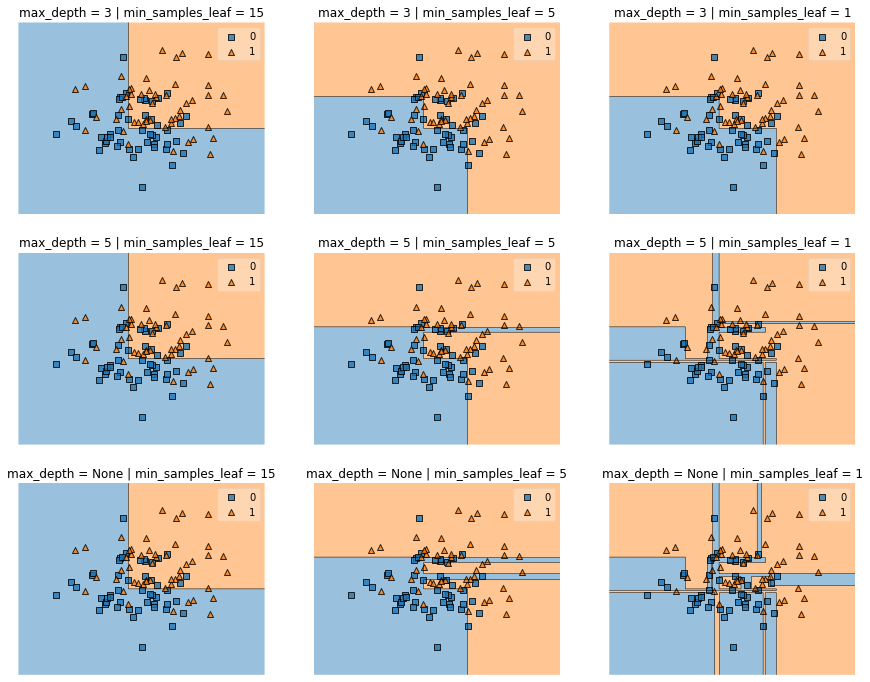

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
        ax[i][j].axis('off')
        plot_decision_regions(X, y, dt, ax=ax[i][j])
plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

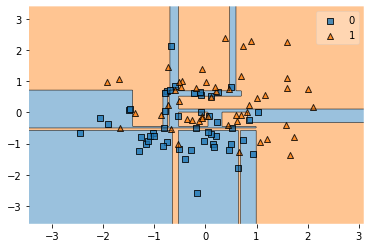

In [31]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
dt.fit(X, y)
plot_decision_regions(X, y, dt)
plt.show()

**Задание** Посчитайте точность алгоритма изображенного выше на обучающей выборке

In [32]:
accuracy_score(y, dt.predict(X))

1.0

## Неустойчивость

**Задание** Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки. Заполните пропуски в коде

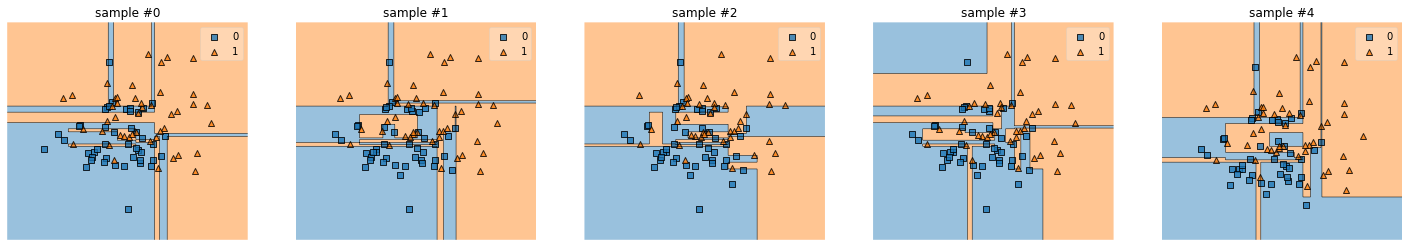

In [37]:
def select_subsample(X, y):
    idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
    X_part, y_part = X[idx_part, :], y[idx_part]
    return X_part, y_part

fig, ax = plt.subplots(ncols=5, figsize=(25, 4))
for i in range(5):
    np.random.seed(i)
    # create subsample
    X_part, y_part = select_subsample(X, y)
    # fit DT
    dt = DecisionTreeClassifier(random_state=13)
    dt.fit(X_part, y_part)
    # Plot boundary
    ax[i].set_title('sample #{}'.format(i))
    ax[i].axis('off')
    plot_decision_regions(X_part, y_part, dt, ax=ax[i])
plt.show()

## Практика

Теперь потренируемся на более реальном датасете.

In [127]:
import pandas as pd
from sklearn.datasets import load_boston

In [128]:
boston = load_boston()

In [129]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [130]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [131]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [132]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
y = boston['target']

print(X.shape, y.shape)

(506, 13) (506,)


In [133]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Задание** Нарисуйте гистограмму для целевой переменной

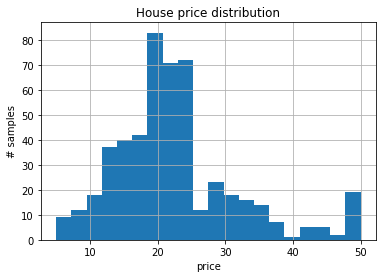

In [134]:
plt.title('House price distribution')
plt.xlabel('price')
plt.ylabel('# samples')
plt.hist(y, bins=20)
plt.grid()

Как всегда, разобьем данные на train и test

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

## Решающее дерево: sklearn

In [136]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=13)

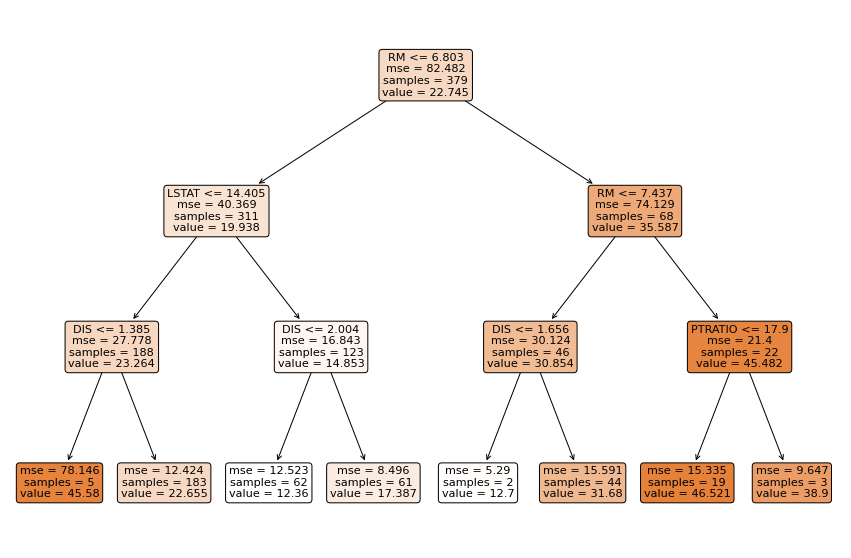

In [142]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True);

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt.predict(X_test), squared=False)

6.140613542993184

**Задание** Давайте посмотрим, как меняется ошибка в зависимости от глубины. Заполните пропуски

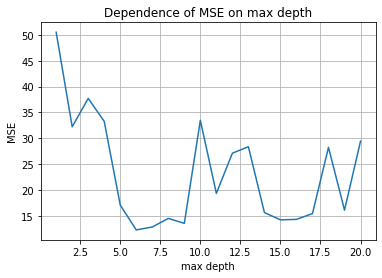

In [66]:
max_depth_array = range(1, 21)
mse_array = []

for max_depth in max_depth_array:
    # train tree with `max_depth`
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    # calculate MSE and add to the list `mse_array`
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
    
plt.plot(max_depth_array, mse_array)
plt.title('Dependence of MSE on max depth')
plt.xlabel('max depth')
plt.ylabel('MSE')
plt.grid()

In [67]:
pd.DataFrame({
    'max_depth': max_depth_array,
    'MSE': mse_array
}).sort_values(by='MSE').reset_index(drop=True)

,max_depth,MSE
0,6,12.259769
1,7,12.822513
2,9,13.531328
3,15,14.205564
4,16,14.299599
5,8,14.481238
6,17,15.420090
7,14,15.616905
8,19,16.090492
9,5,17.071137


**Задание** Давайте посмотрим, как меняется ошибка в зависимости от параметра `min_samples_leaf` при фиксированной глубине (`max_depth=6`). Заполните пропуски.

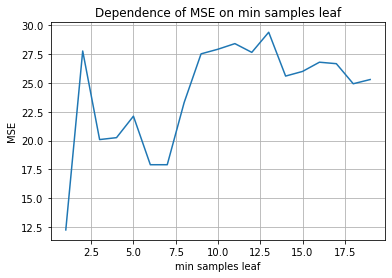

In [68]:
min_samples_leaf_array = range(1, 20)
mse_array = []
for min_samples_leaf in min_samples_leaf_array:
    # train tree with `max_depth`
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
     # calculate MSE and add to the list `mse_array`
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
    
plt.plot(min_samples_leaf_array, mse_array)
plt.title('Dependence of MSE on min samples leaf')
plt.xlabel('min samples leaf')
plt.ylabel('MSE')
plt.grid()

In [70]:
pd.DataFrame({
    'min_samples_leaf': min_samples_leaf_array,
    'MSE': mse_array
}).sort_values(by='MSE').reset_index(drop=True)

,min_samples_leaf,MSE
0,1,12.259769
1,6,17.908766
2,7,17.909083
3,3,20.088437
4,4,20.255276
5,5,22.115940
6,8,23.300598
7,18,24.925912
8,19,25.291371
9,14,25.590832


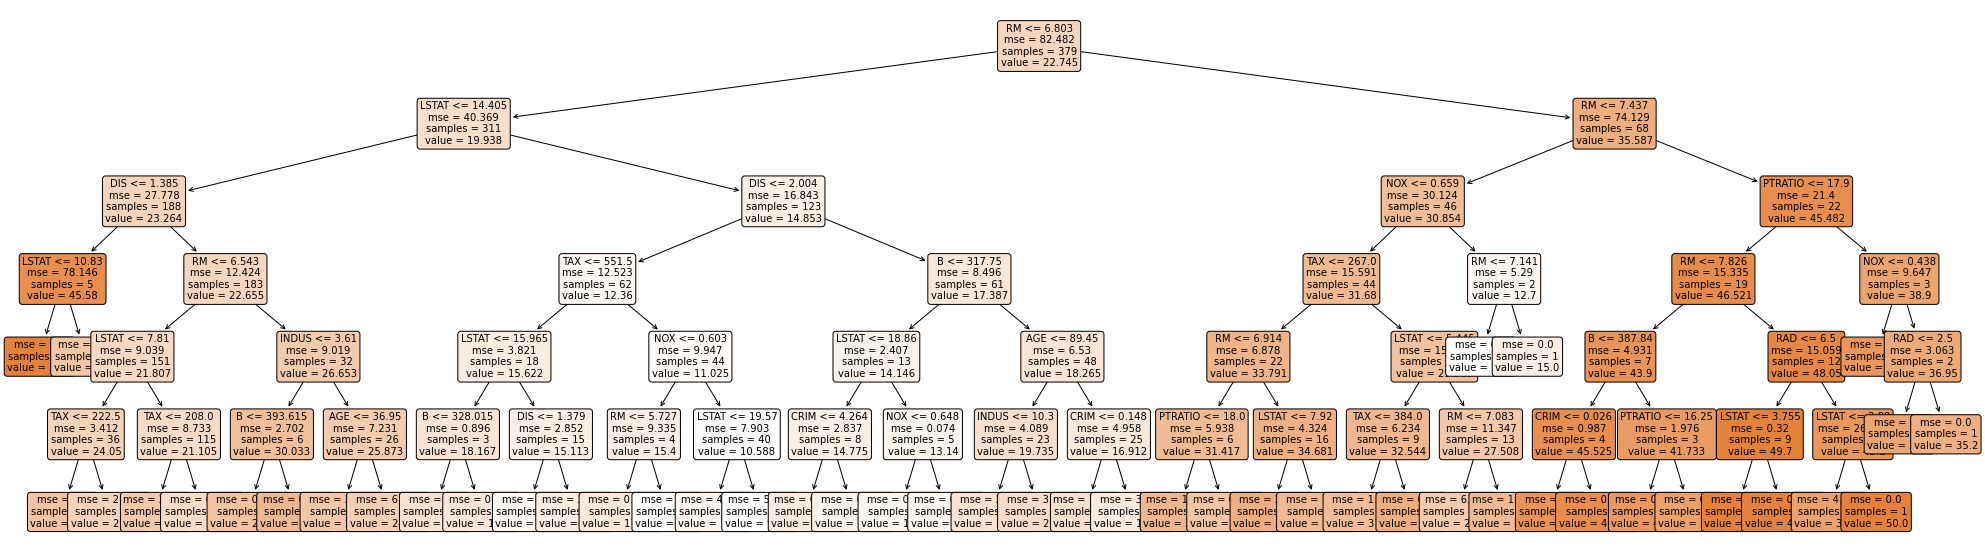

In [83]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=1, random_state=13)
dt.fit(X_train, y_train)

plt.figure(figsize=(35, 10))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

In [84]:
mean_squared_error(y_test, dt.predict(X_test), squared=False)

3.501395298899627

Решающие деревья позволяют посчитать важность признаков

In [86]:
dt.feature_importances_

array([0.0017915 , 0.        , 0.00353474, 0.        , 0.02687167,
       0.59766384, 0.00478304, 0.11292126, 0.0035135 , 0.02381713,
       0.0062183 , 0.00726   , 0.21162502])

In [87]:
pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,RM,0.597664
1,LSTAT,0.211625
2,DIS,0.112921
3,NOX,0.026872
4,TAX,0.023817
5,B,0.007260
6,PTRATIO,0.006218
7,AGE,0.004783
8,INDUS,0.003535
9,RAD,0.003514


Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [88]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
207,0.25199,0.0,10.59,0.0,0.489,5.783,72.7,4.3549,4.0,277.0,18.6,389.43,18.06
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00


In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,-0.382049,0.606785,-0.848363,-0.260011,-0.851779,-0.488599,0.896957,1.486665,-0.159888,-0.690253,0.592093,0.185671,0.285327
97,-0.388162,-0.486443,-1.176083,-0.260011,-0.922106,2.624087,0.271248,-0.164958,-0.859089,-0.737557,-0.214771,0.404139,-1.192625
13,-0.327024,-0.486443,-0.407990,-0.260011,-0.104556,-0.513761,-0.239387,0.437534,-0.626022,-0.554256,1.209107,0.404139,-0.607512
207,-0.372405,-0.486443,-0.049546,-0.260011,-0.535308,-0.759460,0.152580,0.262298,-0.626022,-0.731644,0.070004,0.317425,0.808317
110,-0.389711,-0.486443,-0.346542,-0.260011,-0.262791,-0.149652,-0.505493,-0.521493,-0.509488,-0.098960,1.161645,0.364554,0.077287


In [90]:
# without scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test), squared=False))

6.140613542993184
3.501395298899627


In [91]:
# with scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test_scaled), squared=False))

6.140613542993184
3.501395298899627


### Мультиклассовая классификация

Теперь решим задачу многоклассовой классификации.

In [146]:
from sklearn.datasets import load_digits
data = load_digits()

In [147]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [148]:
y = data['target']
X = data['data']
print(X.shape, y.shape)

(1797, 64) (1797,)


In [149]:
# images contain 8x8 black'n'white pictures of hadwritten digits
data['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

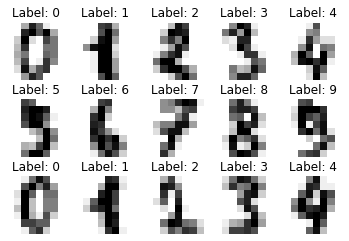

In [150]:
# make a plot
_, axes = plt.subplots(3, 5)
axes = axes.flatten()

for ax, image, label in zip(axes, data['images'], data['target']):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Label: {}'.format(label))

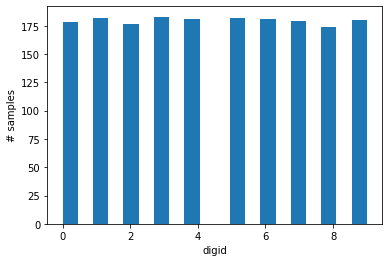

In [151]:
plt.xlabel('digid')
plt.ylabel('# samples')
plt.hist(y, bins=20)
plt.show()

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

Для начала, вспомним как применять линейные модели для многоклассовой классификации

## One-vs-Rest

`sklearn.multiclass.OneVsRestClassifier` превращает модель бинарной классификации в модель многоклассовой по принципу One-vs-Rest

In [153]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(random_state=13, penalty='none', max_iter=3000))
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [154]:
accuracy_score(y_pred, y_test)

0.9066666666666666

In [160]:
y_pred.shape

(450, 10)

In [163]:
from sklearn.metrics import roc_auc_score

y_pred = classifier.predict_proba(X_test)
roc_auc_score(y_test, y_pred, multi_class='ovr')

0.9919413011755491

## One-vs-One

`sklearn.multiclass.OneVsOneClassifier` превращает модель бинарной классификации в модель многоклассовой по принципу One-vs-One

In [164]:
from sklearn.multiclass import OneVsOneClassifier
classifier = OneVsOneClassifier(LogisticRegression(random_state=13, penalty='none', max_iter=3000))
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

0.9622222222222222

In [173]:
y_pred = classifier.decision_function(X_test)
y_pred = y_pred/y_pred.sum(1, keepdims=True)
roc_auc_score(y_test, y_pred, multi_class='ovo')

0.994305976481453

## Decision Tree

Умеет работать в любым количеством классов

In [119]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=13)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

0.8422222222222222

Давайте попробуем улучшить результат решающего дерева.

**Задание** Ипользуя GridSearchCV подберите гиперпараметры модели DecisionTreeClassifier

In [122]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=13)

# define parameter grid
param_grid = {
    'criterion': ['gini',"entropy"],
    'min_samples_split': range(2, 20, 2),
    'max_depth': range(1, 20, 2),
}

# fit 
grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=13),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)},
             scoring='accuracy')

In [123]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}

**Задание** Посчитайте точность лучшего алгоритма на тесте

In [124]:
y_pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.8533333333333334